# DAY 7 - TASK 1 

<b> The Titanic Dataset </b>

This problem can be solved by using Logistic Regression as the target column is Survived and has only two possible categorical outcomes. 

In [349]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#### Load Dataset

In [350]:
df = pd.read_csv("train.csv")

In [351]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<b> Checking all info and datatypes </b>

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [354]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<b> FInding and treating null and missing values </b>

In [355]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

No records of our target column have null or missing values in it 

In [356]:
#Checking first and last record to determine the kind of fill required

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [357]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<b> EDA <b>

C:\Users\CY595VA\AppData\Local\Temp\ipykernel_38356\1627562459.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


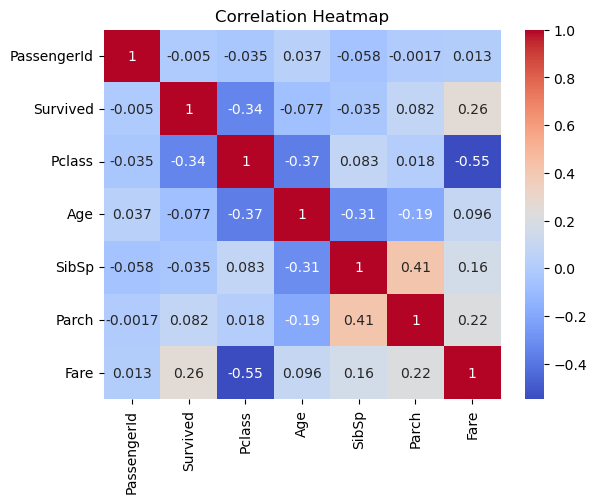

In [358]:
# Correlation between different columns
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

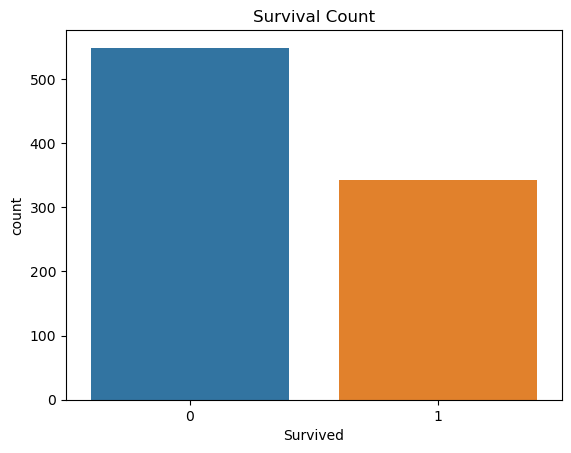

In [359]:
sns.countplot(x = 'Survived', data=df)
plt.title("Survival Count")
plt.show()

In [360]:
survived = (df['Survived'].sum()/df['Survived'].count())*100
died = 100 - survived

print("Survived: ", round(survived))
print("Died: ", round(died))

Survived:  38
Died:  62


It is observed that around 62% of people have died in the titanic accident.

In [361]:
#Comparing Pclass and Survived

Text(0.5, 1.0, 'Pclass and Survived Plot')

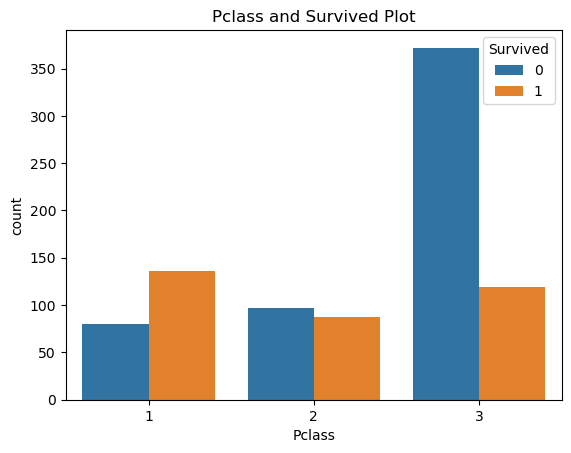

In [362]:
sns.countplot(x='Pclass', hue = 'Survived', data = df)
plt.title("Pclass and Survived Plot")

In [363]:
pclass_survived = df.groupby("Pclass")["Survived"].mean() * 100
print(pclass_survived)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Sex and Survived Plot')

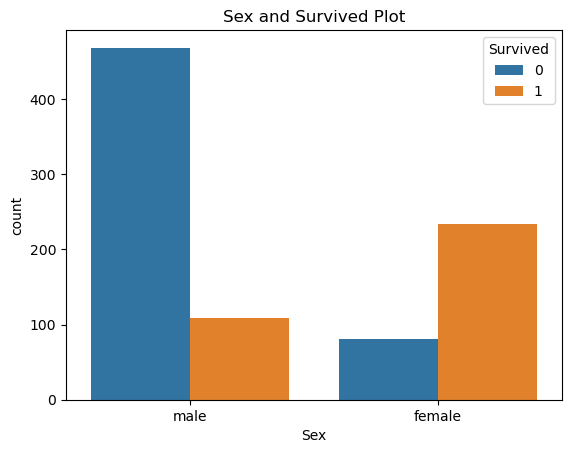

In [364]:
sns.countplot(x='Sex', hue = 'Survived', data = df)
plt.title("Sex and Survived Plot")

In [365]:
sex_survived = df.groupby("Sex")["Survived"].mean() * 100
sex_survived

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

It is observed that more female passengers have survived than male passengers.

<Axes: xlabel='AgeGroup'>

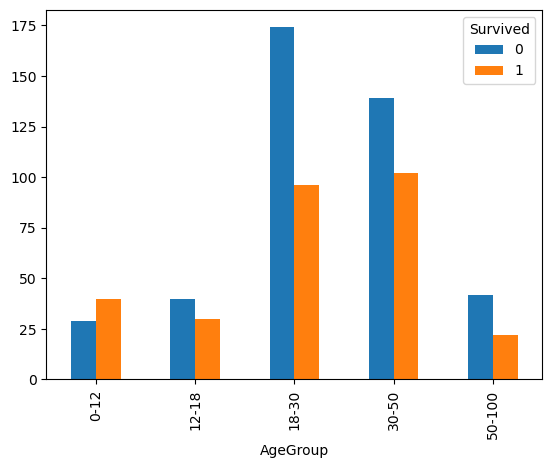

In [366]:
df['AgeGroup'] = pd.cut(df['Age'], bins = [0,12,18,30,50,100], labels = ['0-12', '12-18', '18-30', '30-50', '50-100'], include_lowest = True)
survival_age = df.groupby(['AgeGroup','Survived']).size().unstack()
survival_age.plot(kind = 'bar')

In [367]:
survival_age

Survived,0,1
AgeGroup,,
0-12,29,40
12-18,40,30
18-30,174,96
30-50,139,102
50-100,42,22


<Axes: xlabel='SibSp', ylabel='count'>

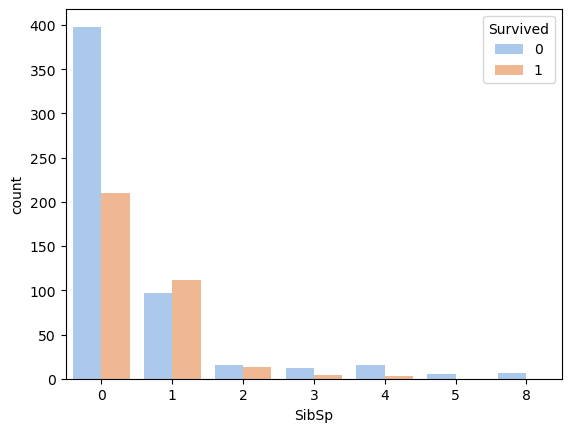

In [368]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = df, palette = 'pastel')

<Axes: xlabel='Parch', ylabel='count'>

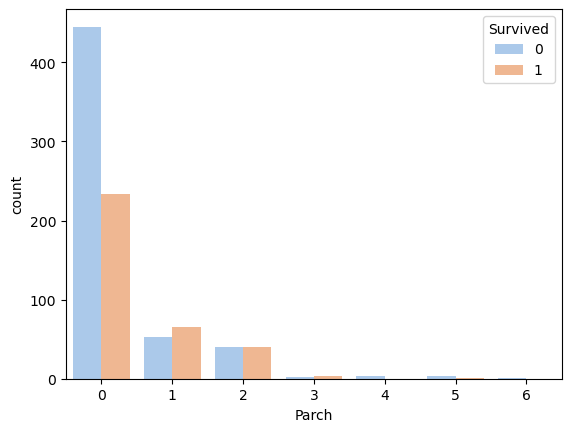

In [369]:
sns.countplot(x = 'Parch', hue = 'Survived', data = df, palette = 'pastel')

On comparing Sibling Spouse and Parch columns, it is observed that most of the people who travelled alone survived.

In [370]:
# Creating a column family to group SibSp and Parch

df['Family'] = df.Parch + df.SibSp
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,18-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-50,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,18-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-50,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-50,0


In [371]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare'>

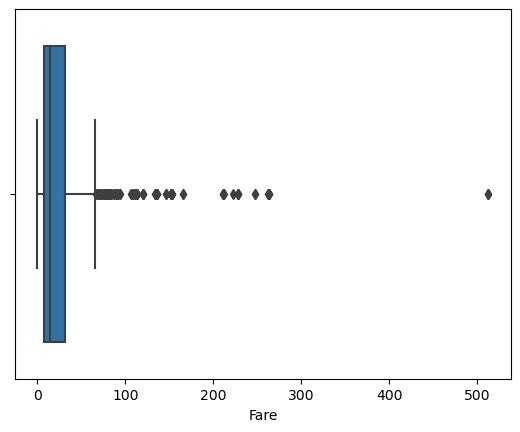

In [372]:
sns.boxplot(x = 'Fare', data = df)

In [373]:
len(df[df['Fare']>150])

29

<Axes: xlabel='Fare_Category', ylabel='count'>

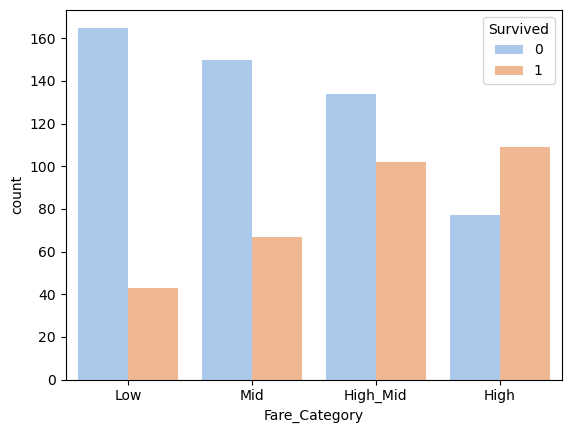

In [374]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,150], labels=['Low','Mid','High_Mid','High'])
sns.countplot(x = 'Fare_Category', hue = 'Survived', data = df, palette = 'pastel')

It is observed that the higher the fare, the more chances of survival. The extreme outliers i.e. Fare > 150  need to be removed.

In [375]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,18-30,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-50,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,18-30,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-50,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-50,0,Mid


<Axes: xlabel='Embarked', ylabel='count'>

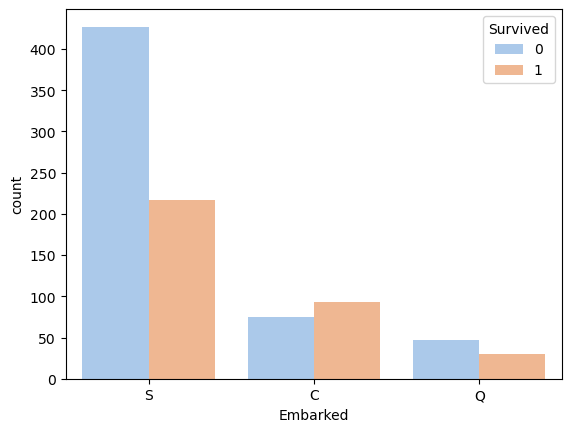

In [376]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = df, palette = 'pastel')

More people embarked on S had more chances of survival. 

<b> Filling null values after analysis </b>

In [377]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Cabin'].fillna("Unknown", inplace = True)

df['AgeGroup'] = pd.cut(df['Age'], bins = [0,12,18,30,50,100], labels = ['0-12', '12-18', '18-30', '30-50', '50-100'], include_lowest = True)
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,150], labels=['Low','Mid','High_Mid','High'], include_lowest = True)

In [378]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
AgeGroup          0
Family            0
Fare_Category    29
dtype: int64

In [379]:
#Removing Fares more than 150

df2 = df[df['Fare'] < 150]

In [380]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
AgeGroup         0
Family           0
Fare_Category    0
dtype: int64

Encoding Sex Column 

In [381]:
df2.loc[:, 'Sex'] = LabelEncoder().fit_transform(df2['Sex'])

C:\Users\CY595VA\AppData\Local\Temp\ipykernel_38356\512970447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Sex'] = LabelEncoder().fit_transform(df2['Sex'])
C:\Users\CY595VA\AppData\Local\Temp\ipykernel_38356\512970447.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:, 'Sex'] = LabelEncoder().fit_transform(df2['Sex'])


In [382]:
df2.loc[:, 'Embarked'] = LabelEncoder().fit_transform(df2['Embarked'])

C:\Users\CY595VA\AppData\Local\Temp\ipykernel_38356\739654467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Embarked'] = LabelEncoder().fit_transform(df2['Embarked'])
C:\Users\CY595VA\AppData\Local\Temp\ipykernel_38356\739654467.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:, 'Embarked'] = LabelEncoder().fit_transform(df2['Embarked'])


<b> Dropping columns not required </b>

In [383]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'Family',
       'Fare_Category'],
      dtype='object')

In [384]:
df2.drop(['PassengerId', 'Name',  'SibSp',
       'Parch', 'Ticket', 'Cabin', 'AgeGroup',
       'Fare_Category'], axis=1, inplace=True)

C:\Users\CY595VA\AppData\Local\Temp\ipykernel_38356\2246101130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['PassengerId', 'Name',  'SibSp',


In [385]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,0
887,1,1,0,19.0,30.0000,2,0
888,0,3,0,28.0,23.4500,2,3
889,1,1,1,26.0,30.0000,0,0


#### Train and Test Split

In [386]:
df_train, df_test = train_test_split(df2, train_size = 0.7, random_state = 100)

In [387]:
df_train.shape, df_test.shape

((603, 7), (259, 7))

In [388]:
y_train = df_train.pop("Survived")
X_train = df_train

In [389]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Family
60,3,1,22.0,7.2292,0,0
690,1,1,31.0,57.0000,2,1
43,2,0,3.0,41.5792,0,3
505,1,1,18.0,108.9000,0,1
238,2,1,19.0,10.5000,2,0
...,...,...,...,...,...,...
80,3,1,22.0,9.0000,2,0
884,3,1,25.0,7.0500,2,0
864,2,1,24.0,13.0000,2,0
820,1,0,52.0,93.5000,2,2


In [390]:
y_train

60     0
690    1
43     1
505    0
238    0
      ..
80     0
884    0
864    0
820    1
537    1
Name: Survived, Length: 603, dtype: int64

In [391]:
y_test = df_test.pop("Survived")
X_test = df_test

In [392]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Family
370,1,1,25.0,55.4417,0,1
228,2,1,18.0,13.0000,2,0
876,3,1,20.0,9.8458,2,0
176,3,1,28.0,25.4667,2,4
592,3,1,47.0,7.2500,2,0
...,...,...,...,...,...,...
826,3,1,28.0,56.4958,2,0
578,3,0,28.0,14.4583,0,1
732,2,1,28.0,0.0000,2,0
460,1,1,48.0,26.5500,2,0


In [393]:
y_test

370    1
228    0
876    0
176    0
592    0
      ..
826    0
578    0
732    0
460    1
611    0
Name: Survived, Length: 259, dtype: int64

### Linear Regression

In [394]:
linear_model = LogisticRegression()

In [395]:
linear_model.fit(X_train, y_train)

LogisticRegression()

In [396]:
y_test_pred= linear_model.predict(X_test)

#### RMSE

In [397]:
print(np.sqrt(np.mean((y_test_pred-y_test)**2)))

0.46499055497527714


#### Accuracy

In [398]:
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.7837837837837838

#### Classification Report

In [399]:
rep = classification_report(y_test, y_test_pred)
rep

'              precision    recall  f1-score   support\n\n           0       0.86      0.80      0.83       169\n           1       0.67      0.74      0.71        90\n\n    accuracy                           0.78       259\n   macro avg       0.76      0.77      0.77       259\nweighted avg       0.79      0.78      0.79       259\n'